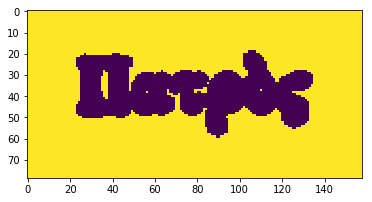

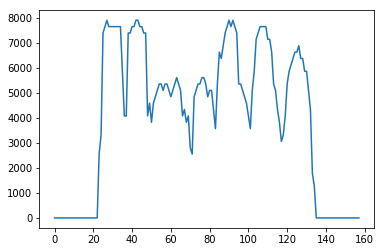

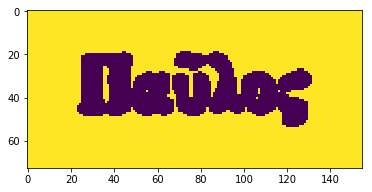

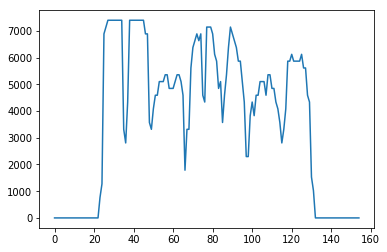

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
#from  PgFunctions import *
#img2 = cv2.imread("word/pneuma.png",0);

def createPadding(img, margin):
    w=img.shape[1]
    #print(w)
    for i in range(10):
        img = np.insert(img, w, values=255, axis=1)

    for i in range(10):
        img = np.insert(img, 0, values=255, axis=1)    
    
    h=img.shape[0]
    #print(w)
    for i in range(10):
        img = np.insert(img, h, values=255, axis=0)
    
    for i in range(10):
        img = np.insert(img, 0, values=255, axis=0)
    
    
    return img


def applyCircleErosion(word_img,r):
    word_img=createPadding(word_img, 20) 
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(r,r))
    erode_img = cv2.erode(word_img, kernel, iterations=1)
    return erode_img



wordFiles=["word/pneuma.png"]
wordFiles=["word/pneuma.png","test/0152.pdf300/1467-312-122-36.png"]
wordFiles=["word/pneuma.png","word/patera.png"]
wordFiles=["word/pneuma.png","word/patros.png"]
wordFiles=["word/pneuma.png","word/paulos.png"]
wordFiles=["word/patros.png","word/paulos.png"]
words=[]
for file in wordFiles:
   

    img1 = cv2.imread(file,0);
    img1=createPadding(img1, 20)
    img1=applyCircleErosion(img1,5)
    plt.figure()
    plt.imshow(img1)
    
    #
    ##########################
    
    #{
    imgbit1=img1/255
    imgbit1 = cv2.bitwise_not(img1)
    y1=imgbit1.sum(axis=0)
    num=np.size(imgbit1,1)
    b = np.arange(num)
    fig, ax = plt.subplots()
    ax.plot(b,y1)
    plt.show()
    
    
    #print(imgbit1.shape)
    h=imgbit1.shape[0]
    w=imgbit1.shape[1]
    index=np.where(y1==0)
    xarr=index[0]
    
    
    
    
    

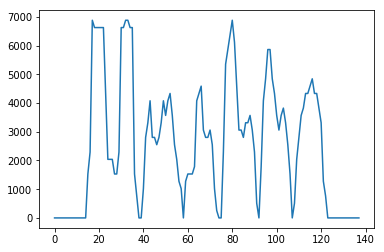

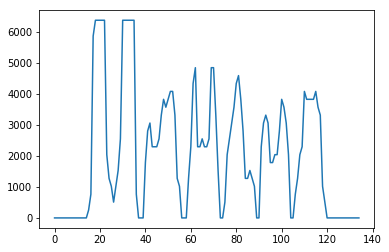

53
6
char 1
cnt1 3
cnt2 3
0.010062707350627052 HU
0.07716629654169083 SC
char 2
cnt1 3
cnt2 3
0.19395210796992302 HU
0.06304794549942017 SC
char 3
cnt1 2
cnt2 3
0.20552124893523327 HU
0.1861158013343811 SC
char 4
cnt1 2
cnt2 2
0.23835915770290622 HU
0.18148674070835114 SC
char 5
cnt1 3
cnt2 4
0.5939235476243154 HU
0.11130958050489426 SC
char 6
cnt1 2
cnt2 2
0.07151226037987633 HU
0.05253540724515915 SC


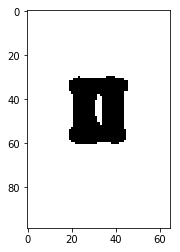

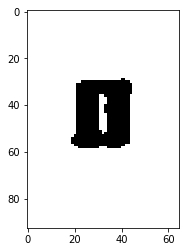

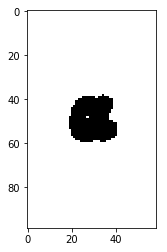

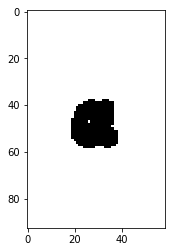

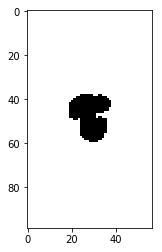

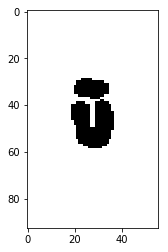

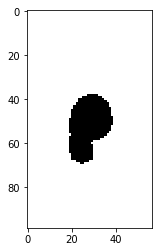

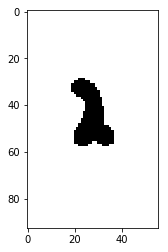

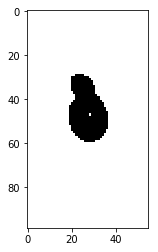

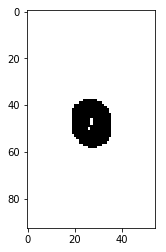

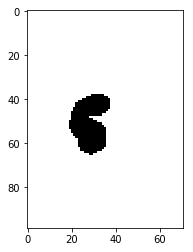

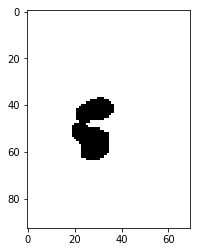

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
#from  PgFunctions import *
#img2 = cv2.imread("word/pneuma.png",0);

def createPadding(img, margin):
    w=img.shape[1]
    #print(w)
    for i in range(10):
        img = np.insert(img, w, values=255, axis=1)

    for i in range(10):
        img = np.insert(img, 0, values=255, axis=1)    
    
    h=img.shape[0]
    #print(w)
    for i in range(10):
        img = np.insert(img, h, values=255, axis=0)
    
    for i in range(10):
        img = np.insert(img, 0, values=255, axis=0)
    
    
    return img


def applyCircleErosion(word_img,r):
    word_img=createPadding(word_img, 20) 
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(r,r))
    erode_img = cv2.erode(word_img, kernel, iterations=1)
    return erode_img




wordFiles=["word/pneuma.png"]


wordFiles=["word/pneuma.png","test/0152.pdf300/1467-312-122-36.png"]

wordFiles=["word/pneuma.png","word/patera.png"]
wordFiles=["word/pneuma.png","word/patros.png"]
wordFiles=["word/pneuma.png","word/paulos.png"]
wordFiles=["word/patros.png","word/paulos.png"]
words=[]
for file in wordFiles:
   

    img1 = cv2.imread(file,0);
    img1=createPadding(img1, 20)

    ##########################

    #{
    imgbit1=img1/255
    imgbit1 = cv2.bitwise_not(img1)
    y1=imgbit1.sum(axis=0)
    num=np.size(imgbit1,1)
    b = np.arange(num)
    fig, ax = plt.subplots()
    ax.plot(b,y1)
    plt.show()
    
    
    
    #print(imgbit1.shape)
    h=imgbit1.shape[0]
    w=imgbit1.shape[1]
    index=np.where(y1==0)
    xarr=index[0]
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    uniq=[]      
    for i in range(len(xarr)):
        #print(i,xarr[i])
        
        if i==len(xarr)-1:
            continue
        
        
        if xarr[i]==xarr[i+1]-1:
            continue
            
        else:
            uniq.append(xarr[i])
    
    
    #print(uniq)
   
    letters=[]
    for i in range(len(uniq)):  
        if i==len(uniq)-1:
            letter=img1[0:h,uniq[i]:w]
            letters.append(letter)
            ###plt.figure()
            ###plt.imshow(letters[i], cmap='gray')
            _, Contours, _ = cv2.findContours(letters[i], cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
            continue
        #print(uniq[i])
        letter=img1[0:h,uniq[i]:uniq[i+1]]
        letters.append(letter)
        #letter=img1[0:44,0:h]
        ###plt.figure()
        ###plt.imshow(letters[i], cmap='gray')
        _, Contours, _ = cv2.findContours(letters[i], cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
        
        #ret = cv2.matchShapes(Contours[0],Contours[0],3,0.0)
        #print(ret)
    words.append(letters)
    
    
    
    
print("=====================") 
print(len(words[1][0]))
#plt.figure()
#plt.imshow(words[1][4], cmap='gray')


print(len(words[1]))       
sd = cv2.createShapeContextDistanceExtractor()        
for i in range(20) :
    if i>5:
        continue
    char1=createPadding(words[0][i],10)
    char1=applyCircleErosion(char1,5)
    char2=createPadding(words[1][i],10)
    char2=applyCircleErosion(char2,5)
    _, cnt1, _ = cv2.findContours(char1, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
    
    
    _, cnt2, _ = cv2.findContours(char2, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
    
    #print(cnt1)
    
    try:
        
        #char2=createPadding(words[1][i])
        plt.figure()
        
        plt.imshow(char1, cmap='gray')
        #plt.imshow(words[0][i], cmap='gray')
        plt.figure()
        plt.imshow(char2, cmap='gray')
        #plt.imshow(words[1][i], cmap='gray')

        print("char",i+1)
        print("cnt1",len(cnt1))
        print("cnt2",len(cnt2))
        ret = cv2.matchShapes(cnt1[1],cnt2[1],3,0.0)
        abc = sd.computeDistance(cnt1[1],cnt2[1])
        print(ret,"HU")
        print(abc,"SC")
    except:
        #print(i)
        print()
    
    
    
    
    
    
        